In [1]:
#Load libaries
import os
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
from pydotplus import graph_from_dot_data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC 
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score, KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Load datasets
data = pd.read_csv('CA_Wildfires_by_county.csv')           # Data on 44 counties

In [2]:
data.head()

,NDVI,LST,TA,Class
0,0.539433,284.331062,5,No_fire
1,0.541694,284.703651,5,No_fire
2,0.543955,285.613754,5,No_fire
3,0.546217,285.381590,5,No_fire
4,0.548478,278.491765,5,No_fire


In [3]:
data["Class"].replace({"Fire": 1, "No_fire": 0}, inplace=True)
data = data[['NDVI','LST','TA','Class']]

In [4]:
data

,NDVI,LST,TA,Class
0,0.539433,284.331062,5,0
1,0.541694,284.703651,5,0
2,0.543955,285.613754,5,0
3,0.546217,285.381590,5,0
4,0.548478,278.491765,5,0
...,...,...,...,...
42393,0.577000,281.971220,5,0
42394,0.584449,278.337573,5,0
42395,0.591899,282.713003,5,0
42396,0.599348,284.053572,5,0


In [5]:
data.TA.value_counts()

5    38192
9     2170
8     1538
4      437
7       56
6        5
Name: TA, dtype: int64

In [6]:
data = data[(data.TA !=4) & (data.TA !=6)]

In [7]:
data.TA.value_counts()


5    38192
9     2170
8     1538
7       56
Name: TA, dtype: int64

In [8]:
Count=data.Class.value_counts() #count target feature 
Count

0    40586
1     1370
Name: Class, dtype: int64

In [9]:
print('Proportion:', round(Count[0] / Count[1], 2), ': 1')


Proportion: 29.62 : 1


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41956 entries, 0 to 42397
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NDVI    41956 non-null  float64
 1   LST     41956 non-null  float64
 2   TA      41956 non-null  int64  
 3   Class   41956 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 1.6 MB


In [11]:
data.describe() # Statistic summary

,NDVI,LST,TA,Class
count,41956.000000,41956.000000,41956.000000,41956.000000
mean,0.494344,296.003562,5.319525,0.032653
std,0.154746,12.336897,1.029912,0.177729
min,0.112336,250.800000,5.000000,0.000000
25%,0.392264,286.860235,5.000000,0.000000
50%,0.500312,296.397268,5.000000,0.000000
75%,0.605684,305.483123,5.000000,0.000000
max,0.847128,329.900122,9.000000,1.000000


In [12]:
data.isnull().sum() # return number of missing value for each column

NDVI     0
LST      0
TA       0
Class    0
dtype: int64

In [13]:
#data = data.fillna(data.mean()) #Fill 13 missing values in NDVI with average NDVI
#data = data.dropna() #drop all rows contain NaN

In [14]:
data.drop(columns='Class').skew(axis = 0) # return skewness of each independent feature

NDVI   -0.237924
LST    -0.152750
TA      2.985427
dtype: float64

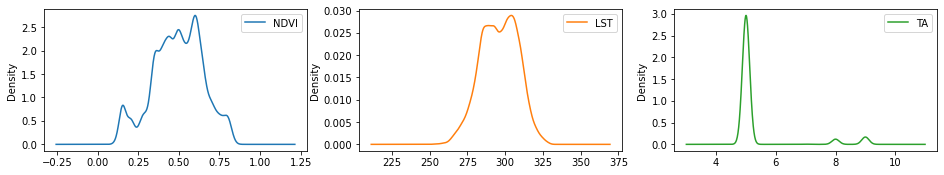

In [15]:
# Density
data.drop(columns='Class').plot(kind='density', subplots=True, layout=(4,3),figsize=(16, 12), sharex=False)
plt.show()

In [16]:

data.corr() #return correlation between columns

,NDVI,LST,TA,Class
NDVI,1.000000,-0.356105,-0.027411,-0.050214
LST,-0.356105,1.000000,0.091242,0.164663
TA,-0.027411,0.091242,1.000000,0.160456
Class,-0.050214,0.164663,0.160456,1.000000


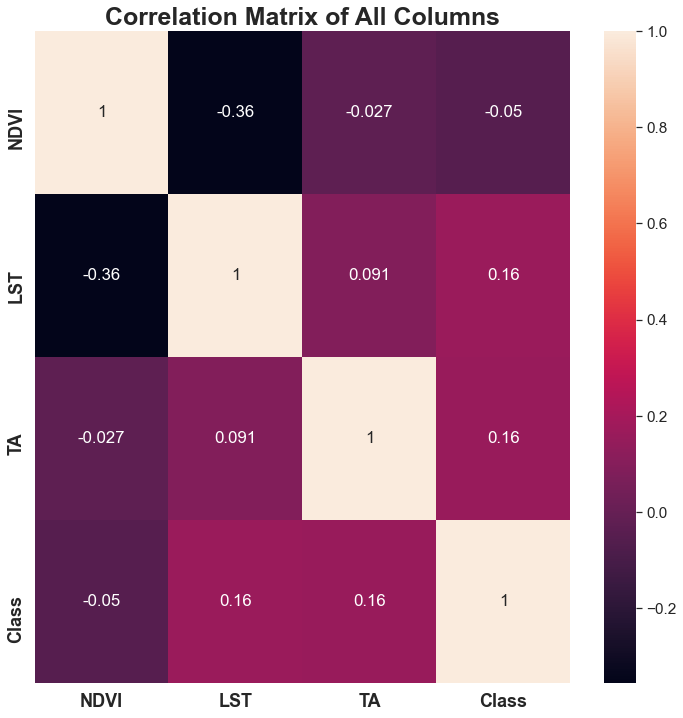

In [17]:
#Correlation matrix
plt.figure(figsize=(12, 12))
corr = data.corr()
sns.set(font_scale=1.4)
res=sns.heatmap(corr, annot=True)
res.set_title("Correlation Matrix of All Columns",fontsize=25,fontweight='bold')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 18,fontweight='bold')
res.set_yticklabels(res.get_xmajorticklabels(), fontsize = 18,fontweight='bold')
plt.savefig('C:/Users/kayle/Desktop/CorrMatrix',dpi=300) #, transparent=True)
plt.show()

In [18]:
data.Class.value_counts() #count target feature 

0    40586
1     1370
Name: Class, dtype: int64

C:\Users\kayle\Anaconda3\lib\site-packages\pandas\core\series.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


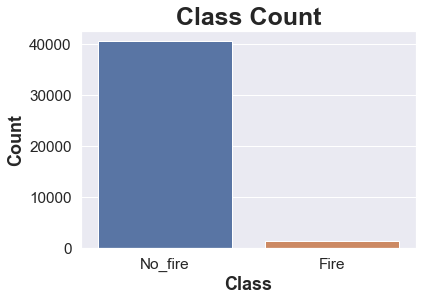

In [19]:
data["Class"].replace({1:"Fire", 0:"No_fire"}, inplace=True)
#count plot of target feature
classCount= sns.countplot(x='Class', data = data)
classCount.axes.set_title("Class Count",fontsize=25,fontweight='bold')
classCount.set_xlabel("Class",fontsize=18,fontweight='bold')
classCount.set_ylabel("Count",fontsize=18,fontweight='bold')
plt.savefig('C:/Users/kayle/Desktop/ClassCount',dpi=300,bbox_inches='tight')
plt.show()

In [20]:
data["Class"].replace({"Fire": 1, "No_fire": 0}, inplace=True)

C:\Users\kayle\Anaconda3\lib\site-packages\pandas\core\series.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


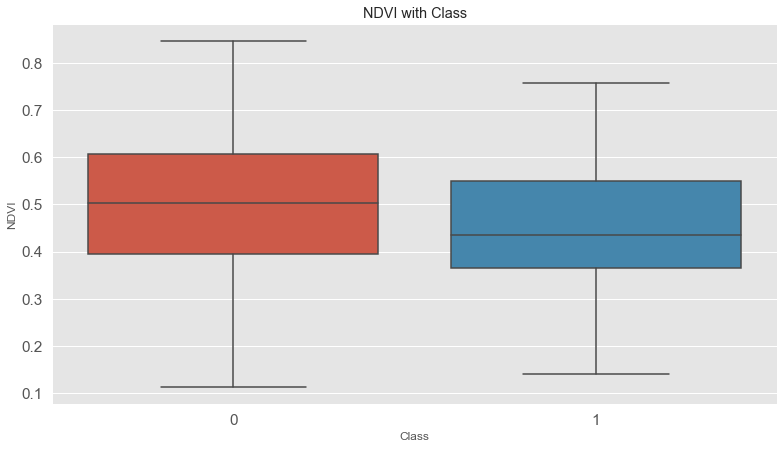

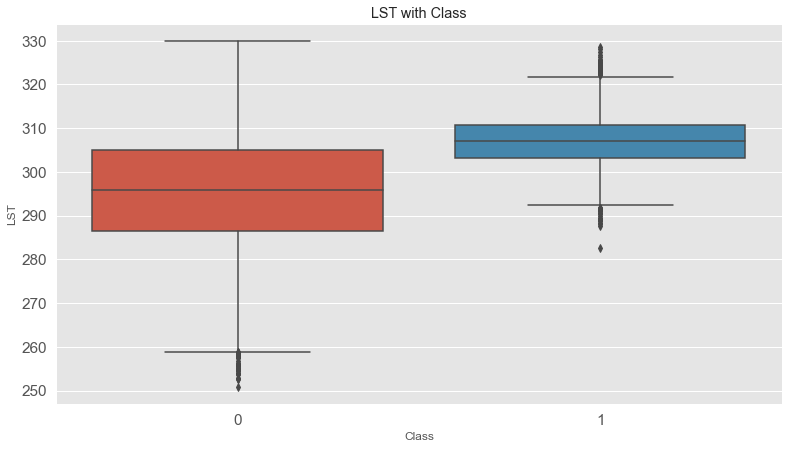

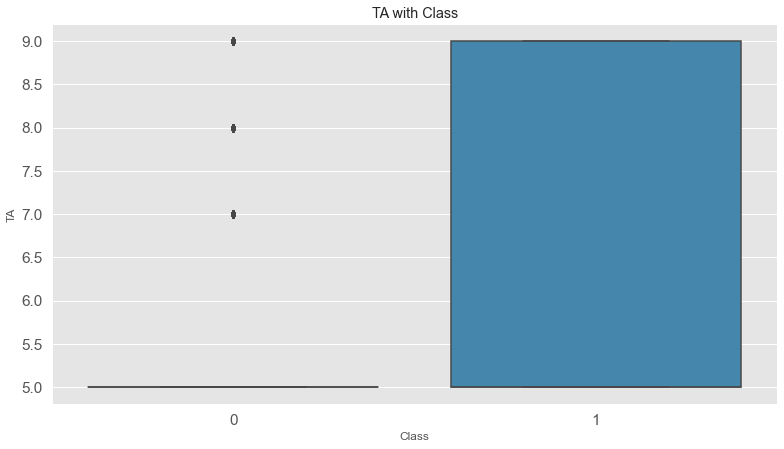

In [21]:
# Visualiztion of outliers data
column_names = ['NDVI', 'LST', 'TA']
#Boxplot
train = data[column_names]
plt.style.use('ggplot')
for i in column_names:
    plt.figure(figsize=(13, 7))
    plt.title(str(i) + " with " + str('Class'))
    sns.boxplot(x=data.Class, y=train[i])
    plt.show()

In [29]:
#Undersampling for imbalance class
X= data.drop(columns=['Class'])
Y = data['Class']
from imblearn.under_sampling import RandomUnderSampler
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X,Y= undersample.fit_resample(X,Y)

In [30]:
Count=Y.value_counts() #count target feature 
Count

0    1370
1    1370
Name: Class, dtype: int64

# Applying models and evalution

# Logistic Regression

In [31]:
X= data.drop(columns=['Class']).values
Y = data['Class'].values
# X = X
# Y = Y
scale= StandardScaler()
X = scale.fit_transform(X) 
# 20% test 80% training data             
X_train, X_test, y_train, y_test, = train_test_split(X, Y, test_size=0.2,random_state = 42)

                                                         # 0.25 x 0.8 = 0.2 for validation data
X_train, X_val, y_train, y_val, = train_test_split(X_train, y_train, test_size=0.25,random_state = 16) 

# Instantiate

LR = LogisticRegression(C=0.01, penalty= 'l2', solver= 'liblinear')
# Fit
LR = LR.fit(X_train, y_train)
LR.score(X_train,y_train)

# Predictions on the test dataset
LR_pred = pd.DataFrame(LR.predict(X_test))

# Probabilities on the test dataset
probs = pd.DataFrame(LR.predict_proba(X_test))

print(metrics.classification_report(y_test, LR_pred))   #Logistic Regression 


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8096
           1       0.00      0.00      0.00       296

    accuracy                           0.96      8392
   macro avg       0.48      0.50      0.49      8392
weighted avg       0.93      0.96      0.95      8392



C:\Users\kayle\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


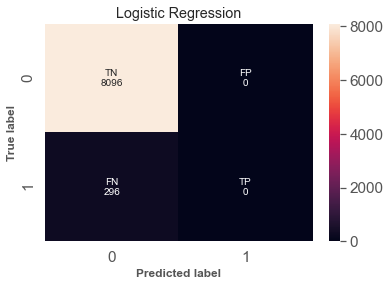

In [62]:
LR_cm = confusion_matrix(y_test, LR_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                LR_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(LR_cm,annot=labels,fmt='')
plt.title('Logistic Regression')
plt.ylabel('True label',fontweight='bold')
plt.xlabel('Predicted label',fontweight='bold')
plt.savefig('C:/Users/kayle/Desktop/LR_confmatrix_county',dpi=300,bbox_inches='tight', transparent=True)

In [33]:
# #Hyperparameter Tuning for Logistic Regression
# # define models and parameters
# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# penalty = ['l2']
# c_values = [100, 10, 1.0, 0.1, 0.01]
# # define grid search
# grid = dict(solver=solvers,penalty=penalty,C=c_values)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=LR, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X, Y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))


In [34]:
# get prediction for X_val
new_output = LR.predict(X_val)
np.unique(new_output,return_counts=True)

(array([0], dtype=int64), array([8391], dtype=int64))

In [35]:
np.unique(y_val,return_counts=True)

(array([0, 1], dtype=int64), array([8125,  266], dtype=int64))

# Gaussian Naive Bayes

In [36]:
X= data.drop(columns=['Class']).values
Y = data['Class'].values
scale= StandardScaler()
X = scale.fit_transform(X) 

# 20% test 80% training data             
X_train, X_test, y_train, y_test, = train_test_split(X, Y, test_size=0.2,random_state = 42)

                                                         # 0.25 x 0.8 = 0.2 for validation data
X_train, X_val, y_train, y_val, = train_test_split(X_train, y_train, test_size=0.25,random_state = 42) 

#NB = MultinomialNB()
NB= GaussianNB(var_smoothing= 0.12328467394420659)
NB.fit(X_train, y_train)

NB_pred = pd.DataFrame(NB.predict(X_test))

print(metrics.classification_report(y_test, NB_pred))   #Gaussian Naive Bayes

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      8096
           1       0.21      0.28      0.24       296

    accuracy                           0.94      8392
   macro avg       0.59      0.62      0.60      8392
weighted avg       0.95      0.94      0.94      8392



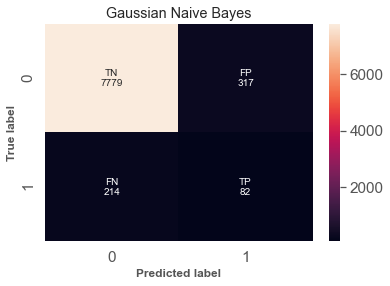

In [63]:
NB_cm = confusion_matrix(y_test, NB_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                NB_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(NB_cm,annot=labels,fmt='')
plt.title('Gaussian Naive Bayes')
plt.ylabel('True label',fontweight='bold')
plt.xlabel('Predicted label',fontweight='bold')
plt.savefig('C:/Users/kayle/Desktop/GaussianNB_confmatrix_county',dpi=300,bbox_inches='tight', transparent=True)

In [38]:
# #Hyperparameter Tuning for Gaussian Naive Bayes
# params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
# NB = GaussianNB()
# NB_ran = RandomizedSearchCV(NB, param_distributions=params_NB, 
#                             verbose=2, cv=3, random_state=42, n_iter=10, scoring='accuracy')
# NB_ran.fit(X_train, y_train)
# NB_ran.best_params_

In [39]:
# get prediction for X_val
new_output = NB.predict(X_val)
np.unique(new_output,return_counts=True)

(array([0, 1], dtype=int64), array([8012,  379], dtype=int64))

In [40]:
np.unique(y_val,return_counts=True)

(array([0, 1], dtype=int64), array([8120,  271], dtype=int64))

# K - Nearest Neighbors

In [41]:
X= data.drop(columns=['Class']).values
Y = data['Class'].values
scale= StandardScaler()
X = scale.fit_transform(X) 

# 20% test 80% training data             
X_train, X_test, y_train, y_test, = train_test_split(X, Y, test_size=0.2,random_state = 42)

                                                    # 0.25 x 0.8 = 0.2 for validation data
X_train, X_val, y_train, y_val, = train_test_split(X_train, y_train, test_size=0.25, random_state = 42) 

#(metric= 'manhattan', n_neighbors= 13, weights= 'distance')
KNN = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 13, weights='uniform')  
KNN.fit(X_train, y_train)

KNN_pred = pd.DataFrame(KNN.predict(X_test))

print(metrics.classification_report(y_test, KNN_pred))   #K-NearestNeighbors

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8096
           1       0.57      0.07      0.12       296

    accuracy                           0.97      8392
   macro avg       0.77      0.53      0.55      8392
weighted avg       0.95      0.97      0.95      8392



In [42]:
KNN_pred.value_counts()

0    8357
1      35
dtype: int64

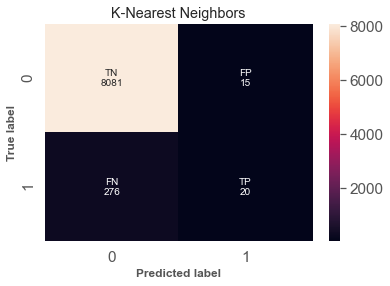

In [64]:
KNN_cm = confusion_matrix(y_test, KNN_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                KNN_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(KNN_cm, annot=labels, fmt='')
plt.title('K-Nearest Neighbors')
plt.ylabel('True label',fontweight='bold')
plt.xlabel('Predicted label',fontweight='bold')
plt.savefig('C:/Users/kayle/Desktop/KNN_confmatrix_county',dpi=300,bbox_inches='tight', transparent=True)

In [44]:
# get prediction for X_val
new_output = KNN.predict(X_val)
np.unique(new_output,return_counts=True)

(array([0, 1], dtype=int64), array([8348,   43], dtype=int64))

In [45]:
np.unique(y_val,return_counts=True)

(array([0, 1], dtype=int64), array([8120,  271], dtype=int64))

In [46]:
# define input
new_input =  X # original dataset
# get prediction for new input
new_output = KNN.predict(new_input)
np.unique(new_output,return_counts=True)

(array([0, 1], dtype=int64), array([41764,   192], dtype=int64))

In [47]:
data.Class.value_counts()

0    40586
1     1370
Name: Class, dtype: int64

In [48]:
# #Hyperparameter Tuning for KNN
# n_neighbors = range(1, 21, 2)
# weights = ['uniform', 'distance']
# metric = ['euclidean', 'manhattan', 'minkowski']
# # define grid search
# grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
# grid_search = GridSearchCV(estimator=KNN, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X, Y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

# Random Forest

In [49]:
X= data.drop(columns=['Class']).values
Y = data['Class'].values
scale= StandardScaler()
X = scale.fit_transform(X) 

# 20% test 80% training data             
X_train, X_test, y_train, y_test, = train_test_split(X, Y, test_size=0.2,random_state = 16)

#Create a RandomForest Classifier
RF = RandomForestClassifier(max_features = 'sqrt', n_estimators = 100)                      

#Train the model using the training sets y_pred=clf.predict(X_test)
RF.fit(X_train,y_train)

RF_pred = RF.predict(X_test) 

print(metrics.classification_report(y_test, RF_pred))   #Random Forest

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      8128
           1       0.47      0.13      0.20       264

    accuracy                           0.97      8392
   macro avg       0.72      0.56      0.59      8392
weighted avg       0.96      0.97      0.96      8392



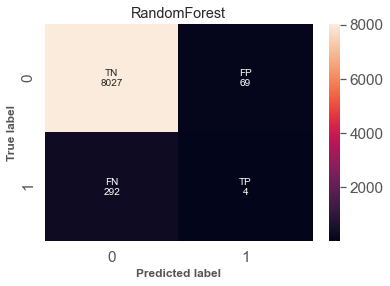

In [65]:
RF_cm = confusion_matrix(y_test, RF_pred)

group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                RF_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(RF_cm,annot=labels,fmt='')
plt.title('RandomForest')
plt.ylabel('True label',fontweight='bold')
plt.xlabel('Predicted label',fontweight='bold')

plt.savefig('C:/Users/kayle/Desktop/RF_confmatrix_county',dpi=300,bbox_inches='tight', transparent=True)

In [51]:
# #Hyperparameter Tuning for RF
# # define parameters
# n_estimators = [10, 100, 1000]
# max_features = ['sqrt', 'log2']
# # define models and parameters
# model = RandomForestClassifier()
# n_estimators = [10, 100, 1000]
# max_features = ['sqrt', 'log2']
# # define grid search
# grid = dict(n_estimators=n_estimators,max_features=max_features)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X, Y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

# Suport Vector Machine

In [52]:
X= data.drop(columns=['Class']).values
Y = data['Class'].values
scale= StandardScaler()
X = scale.fit_transform(X) 

# 20% test 80% training data             
X_train, X_test, y_train, y_test, = train_test_split(X, Y, test_size=0.2,random_state = 42)

                                                                # 0.25 x 0.8 = 0.2 for validation data
X_train, X_val, y_train, y_val, = train_test_split(X_train, y_train, test_size=0.25, random_state = 42) 

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)

# Fitting Kernel SVM to the Training set                            
SVM = SVC(C= 10, gamma= 'scale', kernel= 'rbf')
SVM.fit(X_train,y_train)

#Predicting the Test Set
SVM_pred = SVM.predict(X_test)
print(classification_report(y_test, SVM_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8096
           1       0.00      0.00      0.00       296

    accuracy                           0.96      8392
   macro avg       0.48      0.50      0.49      8392
weighted avg       0.93      0.96      0.95      8392



C:\Users\kayle\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


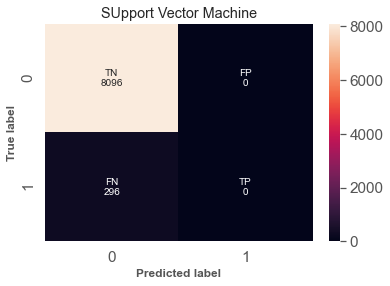

In [66]:
#making confusing matrix
SVM_cm = confusion_matrix(y_test, SVM_pred)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                SVM_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(SVM_cm,annot=labels,fmt='')
plt.title('SUpport Vector Machine')
plt.ylabel('True label',fontweight='bold')
plt.xlabel('Predicted label',fontweight='bold')
plt.savefig('C:/Users/kayle/Desktop/SVM_confmatrix_county',dpi=300,bbox_inches='tight', transparent=True)

In [54]:
# get prediction for X_val
new_output = SVM.predict(X_val)
np.unique(new_output,return_counts=True)

(array([0], dtype=int64), array([8391], dtype=int64))

In [55]:
np.unique(y_val,return_counts=True)

(array([0, 1], dtype=int64), array([8120,  271], dtype=int64))

In [56]:
# #Hyperparameter Tuning for SVM
# # define model and parameters
# model = SVC()
# kernel = ['poly', 'rbf', 'sigmoid']
# C = [50, 10, 1.0, 0.1, 0.01]
# gamma = ['scale']
# # define grid search
# grid = dict(kernel=kernel,C=C,gamma=gamma)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
# grid_result = grid_search.fit(X, Y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

# Nearal Networks

In [57]:
from sklearn.neural_network import MLPClassifier
X= data.drop(columns=['Class']).values
Y = data['Class'].values
scale= StandardScaler()
X = scale.fit_transform(X) 

# 20% test 80% training data             
X_train, X_test, y_train, y_test, = train_test_split(X, Y, test_size=0.2,random_state = 42)

                                                                # 0.25 x 0.8 = 0.2 for validation data
X_train, X_val, y_train, y_val, = train_test_split(X_train, y_train, test_size=0.25, random_state = 42) 

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
#mpl = MLPClassifier(activation= 'tanh', alpha= 0.0001, hidden_layer_sizes= (20,), learning_rate= 'adaptive', solver= 'sgd')
mlp.fit(X_train,y_train)

NN_pred_train = mlp.predict(X_train)
NN_pred_test = mlp.predict(X_test)

In [58]:
print(classification_report(y_test,NN_pred_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      8096
           1       0.50      0.00      0.01       296

    accuracy                           0.96      8392
   macro avg       0.73      0.50      0.49      8392
weighted avg       0.95      0.96      0.95      8392



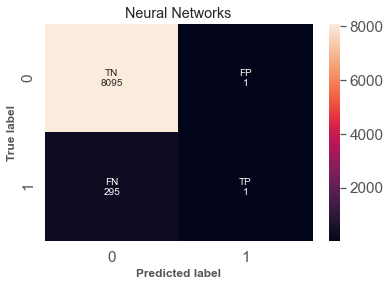

In [67]:
#making confusing matrix
NN_cm = confusion_matrix(y_test, NN_pred_test)
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                NN_cm.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(NN_cm,annot=labels,fmt='')
plt.title('Neural Networks')
plt.ylabel('True label',fontweight='bold')
plt.xlabel('Predicted label',fontweight='bold')
plt.savefig('C:/Users/kayle/Desktop/NN_confmatrix_county',dpi=300,bbox_inches='tight', transparent=True)

In [60]:
# mlp_gs = MLPClassifier(max_iter=100)
# parameter_space = {
#     'hidden_layer_sizes': [(10,30,10),(20,)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }
# from sklearn.model_selection import GridSearchCV
# clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
# clf.fit(X, Y)

In [61]:
# print('Best parameters found:\n', clf.best_params_)